In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set some display options for pandas
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 300)

print("Libraries imported!")

Libraries imported!


In [3]:
# Load the datasets from the raw data folder
df_fake = pd.read_csv('../data/raw/Fake.csv')
df_true = pd.read_csv('../data/raw/True.csv')

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows strong...",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trum...",News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he ...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predece...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned Trump s move to recognize Jerusalem as the capital of Israel. The Pontiff prayed on Monday for the p...,News,"December 25, 2017"


In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under ...",politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. ...",politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator...",politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexande...",politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,"SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past. “Why is the United States Post Office, which is losin...",politicsNews,"December 29, 2017"


In [6]:
# Add a 'label' column to each dataframe
df_fake['label'] = 1
df_true['label'] = 0

# Combine the two dataframes into a single one
df = pd.concat([df_fake, df_true], ignore_index=True)

# Shuffle the dataframe to mix fake and true news
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("DataFrames merged and shuffled.")
df.head()

DataFrames merged and shuffled.


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committed a ‘Coup d’état’ Against the Constitution,"21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocative statements on Judge Jeanine Pirro s show recently. While discussing the halt that was imposed on ...",US_News,"February 13, 2017",1
1,Trump drops Steve Bannon from National Security Council,"WASHINGTON (Reuters) - U.S. President Donald Trump removed his chief strategist Steve Bannon from the National Security Council on Wednesday, reversing his controversial decision early this year to give a political adviser an unprecedented role in security discussions. Trump’s overhaul of the NS...",politicsNews,"April 5, 2017",0
2,Puerto Rico expects U.S. to lift Jones Act shipping restrictions,"(Reuters) - Puerto Rico Governor Ricardo Rossello said on Wednesday he expected the federal government to waive the Jones Act, which would lift restrictions on ships that can provide aid to the island devastated by Hurricane Maria. He said he has been speaking with members of Congress from both ...",politicsNews,"September 27, 2017",0
3,OOPS: Trump Just Accidentally Confirmed He Leaked Israeli Intelligence To Russia (VIDEO),"On Monday, Donald Trump once again embarrassed himself and his country by accidentally revealing the source of the extremely classified information he leaked to Russia earlier this month.While it was speculated that the source of the information was Israel, Trump made things crystal clear during...",News,"May 22, 2017",1
4,Donald Trump heads for Scotland to reopen a golf resort,"GLASGOW, Scotland (Reuters) - Most U.S. presidential candidates go abroad to sharpen their foreign policy credentials. Donald Trump arrives in Scotland on Friday to reopen a golf resort. The presumptive Republican nominee, 70, visits his family’s ancestral homeland to showcase his far-flung busi...",politicsNews,"June 24, 2016",0


In [7]:
print(f"Dataset shape: {df.shape}")
print("\nDataset info:")
df.info()

Dataset shape: (44898, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Label distribution:
label
1    23481
0    21417
Name: count, dtype: int64


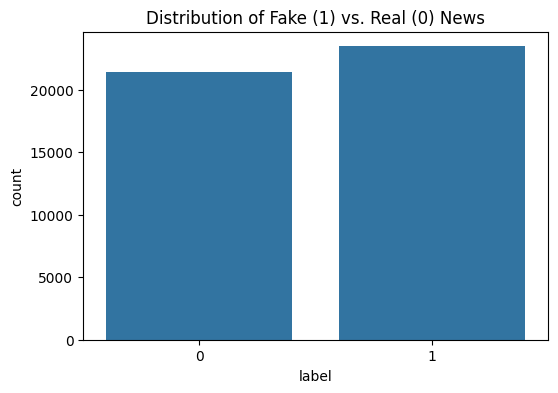

In [9]:
print("Label distribution:")
print(df['label'].value_counts())

# Visualize it
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake (1) vs. Real (0) News')
plt.show()

In [10]:
# Save the combined and shuffled dataframe to the 'interim' folder
df.to_csv('../data/interim/news_dataset.csv', index=False)

print("Cleaned and merged data saved to data/interim/news_dataset.csv")

Cleaned and merged data saved to data/interim/news_dataset.csv
